In [83]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from tqdm import  tqdm

In [84]:
main_path = '/home/kevin/DNA-Methylation-patterns/'
data_path = main_path + 'Datasetb37_bismark/downstream/'
NDR_file = data_path + 'NOMe_out_karl.bed'
NOMe_file = data_path + 'NOMe_in_karl.csv'

In [85]:
temp_storage = []
with open(NDR_file) as f:
    for line in tqdm(f):
        line_s = line.strip().split('\t')
        if line_s[0] == 'chr':
            continue
        
        if line_s[0] == '1':
            temp_storage.append([i for i in map(int, line_s[:3])])
        

3059290it [00:06, 492434.27it/s]


In [86]:
df_NDR = pd.DataFrame(temp_storage, columns=['chr', 'start', 'end'])

In [87]:
df_NDR['length'] = df_NDR['end'] - df_NDR['start']

In [88]:
df_NDR.head()

,chr,start,end,length
0,1,234931,234954,23
1,1,235114,235124,10
2,1,235314,235384,70
3,1,235512,235554,42
4,1,235684,235779,95


In [89]:
df_NDR.shape

(226334, 4)

In [90]:
df_NDR = df_NDR.sort_values(by=['start', 'end'])

In [91]:
df_NDR.head()

,chr,start,end,length
0,1,234931,234954,23
1,1,235114,235124,10
2,1,235314,235384,70
3,1,235512,235554,42
4,1,235684,235779,95


In [92]:
df_NDR_filtered = df_NDR[df_NDR['length'] >= 147]

In [93]:
df_NDR_filtered.shape

(44711, 4)

In [94]:
temp_storage = []
with open(NOMe_file) as f:
    for line in tqdm(f):
        if line.startswith('chr'):
            continue
        line_s = line.strip().split('\t')
        if line_s[0] == '1':
            chr = int(line_s[0])
            start = int(line_s[1])
            end = int(line_s[2])
            mrate = float(line_s[3])
            cov = int(line_s[4])
            strand = line_s[5]
            temp_storage.append([chr, start, end, mrate, cov, strand])

102539429it [03:12, 533373.62it/s]


In [95]:
df_NOMe = pd.DataFrame(temp_storage, columns=['chr', 'start', 'end', 'mrate', 'cov', 'strand'])

In [96]:
df_NOMe.head()

,chr,start,end,mrate,cov,strand
0,1,13026,13027,0.00,3,+
1,1,13034,13035,33.33,3,+
2,1,13053,13054,0.00,3,+
3,1,13057,13058,0.00,3,+
4,1,13062,13063,33.33,3,+


In [97]:
df_NOMe.shape

(8004403, 6)

In [98]:
df_NOMe = df_NOMe.sort_values(by=['start', 'end'])

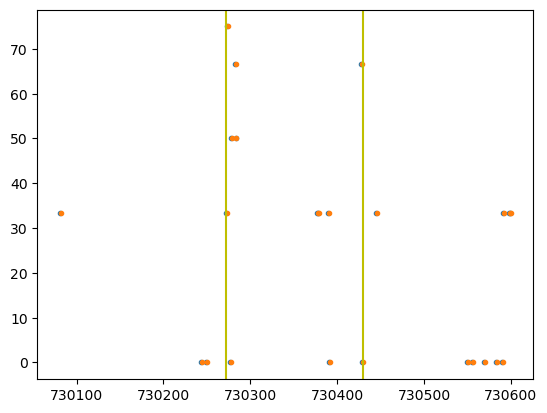

In [101]:
i = 10
background = 200
region = df_NOMe[np.logical_and(df_NOMe['start'] >= df_NDR_filtered['start'].iloc[i] - background, df_NOMe['end'] <= df_NDR_filtered['end'].iloc[i] + background)]
plt.plot(region['start'], region['mrate'], '.')
plt.plot(region['end'], region['mrate'], '.')
plt.axvline(x=df_NDR_filtered['start'].iloc[i], c='y')
plt.axvline(x=df_NDR_filtered['end'].iloc[i], c='y')